In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
import cv2

In [2]:
directory='C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/Dataset'
path_covid_positive_cases=os.path.join('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/Dataset/CT_COVID/')
path_covid_negative_cases=os.path.join('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/Dataset/CT_NonCOVID/')

print('Number of Positive Covid-19 Samples: {}'.format(len(os.listdir(path_covid_positive_cases))))
print('Number of Negative Covid-19 Samples: {}'.format(len(os.listdir(path_covid_negative_cases))))

Number of Positive Covid-19 Samples: 349
Number of Negative Covid-19 Samples: 397


In [3]:
positive_covid_images = glob(os.path.join(path_covid_positive_cases,"*.png"))
negative_covid_images = glob(os.path.join(path_covid_negative_cases,"*.png"))
negative_covid_images.extend(glob(os.path.join(path_covid_negative_cases,"*.jpg")))

In [4]:
covid = {'class': 'CT_COVID','path': path_covid_positive_cases,'images': positive_covid_images}
non_covid = {'class': 'CT_NonCOVID','path': path_covid_negative_cases,'images': negative_covid_images}

In [5]:
subdirs=['CNN/Train/','CNN/Test/']
for subdir in subdirs:
    labeldirs=['CT_COVID','CT_NonCOVID']
    for labeldir in labeldirs:
        newdir=subdir+labeldir 
        os.makedirs(newdir,exist_ok="True")

In [6]:
import shutil
import random

random.seed(69)
test_ratio=0.2

for cases in [covid,non_covid]:
    total_cases=len(cases['images'])
    num_to_select=(int)(total_cases*test_ratio)
    print("No. of Testing",cases['class'],"Samples:",num_to_select)
    #print("Total",cases['class'],"Samples:",total_cases)
    random_files_list=random.sample(cases['images'],num_to_select)
    for files in random_files_list:
        shutil.copy(files,'CNN/Test/'+cases['class'])

No. of Testing CT_COVID Samples: 69
No. of Testing CT_NonCOVID Samples: 79


In [7]:
for cases in [covid,non_covid]:
    images_test_files=os.listdir('CNN/Test/'+cases['class'])
    for images in cases['images']:
        if images.split('\\')[-1] not in images_test_files:
            shutil.copy(images,'CNN/Train/'+cases['class'])

In [8]:
total_train_covid = len(os.listdir('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/CNN/Train/CT_COVID'))
total_train_noncovid = len(os.listdir('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/CNN/Train/CT_NonCOVID'))
total_test_covid = len(os.listdir('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/CNN/Test/CT_COVID'))
total_test_noncovid = len(os.listdir('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/CNN/Test/CT_NonCOVID'))

print("Train sets images COVID: {}".format(total_train_covid))
print("Train sets images Non COVID: {}".format(total_train_noncovid))
print("Test sets images COVID: {}".format(total_test_covid))
print("Test sets images Non COVID: {}".format(total_test_noncovid))

Train sets images COVID: 280
Train sets images Non COVID: 318
Test sets images COVID: 69
Test sets images Non COVID: 79


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_image_gen = ImageDataGenerator(rescale=1./255)
test_image_gen = ImageDataGenerator(rescale=1./255)

train_dir=os.path.join('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/CNN/Train/')
test_dir=os.path.join('C:/Users/Aditya/Documents/GitHub/Covid-19-Diagnosis-from-Lung-CT-Scans/CNN/Test/')

In [11]:
train_generator=train_image_gen.flow_from_directory(train_dir, batch_size=32, class_mode='binary', 
                                                  target_size=(200,200))

Found 598 images belonging to 2 classes.


In [12]:
test_generator=test_image_gen.flow_from_directory(test_dir, batch_size=32, class_mode='binary',
                                               target_size=(200,200))

Found 148 images belonging to 2 classes.


In [13]:
from keras import applications

top_model_weights_path = 'bottleneck_fc_model.h5'
nb_train_samples = 576
nb_validation_samples = 96
batch_size=32

In [14]:
datagen = ImageDataGenerator(rescale=1. / 255)

# build the VGG16 network
model_vgg = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_train = model_vgg.predict_generator(generator, nb_train_samples // batch_size)
#bottleneck_features_train = model_vgg.predict_generator(generator)

np.save('bottleneck_features_train.npy', bottleneck_features_train)

generator = datagen.flow_from_directory(
    test_dir,
    target_size=(200, 200),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_validation = model_vgg.predict_generator(generator, nb_validation_samples // batch_size)
#bottleneck_features_validation = model_vgg.predict_generator(generator)

np.save('bottleneck_features_validation.npy', bottleneck_features_validation)

Found 598 images belonging to 2 classes.


C:\Users\Aditya\AppData\Local\Temp\ipykernel_3944\1768148976.py:12: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_train = model_vgg.predict_generator(generator, nb_train_samples // batch_size)


Found 148 images belonging to 2 classes.


C:\Users\Aditya\AppData\Local\Temp\ipykernel_3944\1768148976.py:23: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  bottleneck_features_validation = model_vgg.predict_generator(generator, nb_validation_samples // batch_size)


In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

train_data = np.load('bottleneck_features_train.npy')
train_labels = np.array([0] * int((nb_train_samples / 2)) + [1] * int((nb_train_samples / 2)))

validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = np.array([0] * int((nb_validation_samples / 2)) + [1] * int((nb_validation_samples / 2)))

modelVgg = Sequential()
modelVgg.add(Flatten(input_shape=train_data.shape[1:]))
modelVgg.add(Dense(256, activation='relu'))
modelVgg.add(Dropout(0.5))
modelVgg.add(Dense(1, activation='sigmoid'))

modelVgg.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

modelVgg.fit(train_data, train_labels,
          epochs=50,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))
modelVgg.save_weights(top_model_weights_path)

Epoch 1/50
18/18 [==============================] - 2s 60ms/step - loss: 3.5170 - accuracy: 0.5365 - val_loss: 1.5616 - val_accuracy: 0.5625
Epoch 2/50
18/18 [==============================] - 1s 41ms/step - loss: 0.9463 - accuracy: 0.6267 - val_loss: 0.6352 - val_accuracy: 0.5833
Epoch 3/50
18/18 [==============================] - 1s 41ms/step - loss: 0.6084 - accuracy: 0.6823 - val_loss: 0.7032 - val_accuracy: 0.5938
Epoch 4/50
18/18 [==============================] - 1s 41ms/step - loss: 0.6077 - accuracy: 0.6771 - val_loss: 0.6484 - val_accuracy: 0.6875
Epoch 5/50
18/18 [==============================] - 1s 42ms/step - loss: 0.5105 - accuracy: 0.7552 - val_loss: 0.6949 - val_accuracy: 0.6354
Epoch 6/50
18/18 [==============================] - 1s 42ms/step - loss: 0.4543 - accuracy: 0.7778 - val_loss: 0.8588 - val_accuracy: 0.6562
Epoch 7/50
18/18 [==============================] - 1s 41ms/step - loss: 0.4452 - accuracy: 0.8038 - val_loss: 0.8074 - val_accuracy: 0.5938
Epoch 8/50
18

In [16]:
test_data_gen = test_image_gen.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(250, 250),
                                                              class_mode='binary')

Found 148 images belonging to 2 classes.


3/3 [==============================] - 0s 6ms/step


<Figure size 432x288 with 0 Axes>

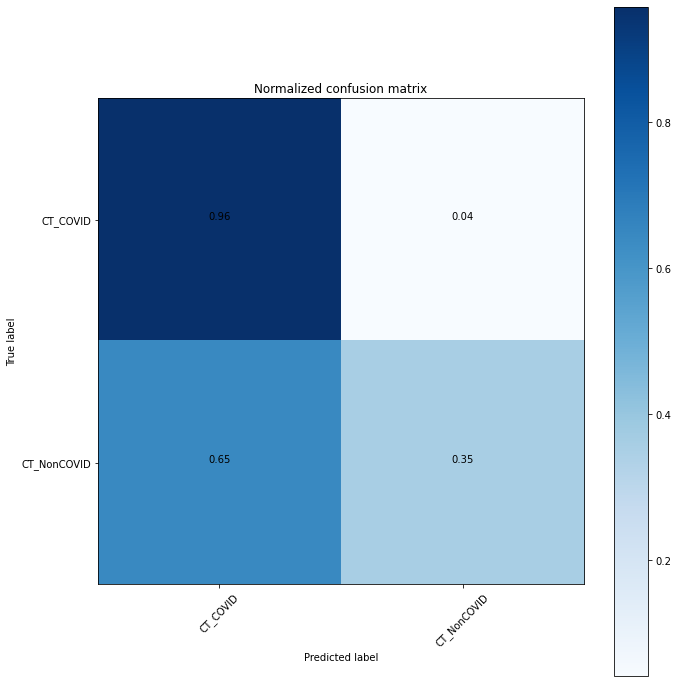

In [21]:
#y_pred =  modelVgg.predict_classes(, batch_size=None).flatten()
import matplotlib.pyplot as plt

y_pred=(modelVgg.predict(validation_data) > 0.5).astype("float32")
y_test = validation_labels
class_names = test_data_gen.class_indices.keys()
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [30]:
accuracy = (cnf_matrix[0][0]+cnf_matrix[1][1])/(cnf_matrix[0][0]+cnf_matrix[1][1]+cnf_matrix[0][1]+cnf_matrix[0][1])
print('Accuracy: %f' % accuracy)
precision = (cnf_matrix[1][1])/(cnf_matrix[1][1]+cnf_matrix[0][1])
print('Precision: %f' % precision)
recall = (cnf_matrix[1][1])/(cnf_matrix[1][1]+cnf_matrix[1][0])
print('Recall: %f' % recall)
f1 = 2*((precision*recall)/(precision+recall))
print('F1 score: %f' % f1)

Accuracy: 0.940299
Precision: 0.894737
Recall: 0.684167
F1 score: 0.775410
